In [6]:
!pip install pystan==2.19.1.1
!pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639592 sha256=09e3862d210f1028d51224c511c557b898f413bdd734650ace579dda7be931fa
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
raw_data = pd.read_csv("/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/Small Sample/ibm.csv")
raw_data.head()

,time,open,high,low,close,volume
0,2022-02-03 18:30:00,136.355176,136.355176,136.355176,136.355176,144
1,2022-02-03 17:30:00,136.720687,136.720687,136.720687,136.720687,300
2,2022-02-03 17:15:00,136.621900,136.720687,136.108210,136.572507,112643
3,2022-02-03 17:00:00,136.720687,136.720687,136.700929,136.700929,200
4,2022-02-03 16:45:00,136.562628,136.671293,136.532992,136.671293,2233


In [30]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

In [31]:
# to run prophet we need to rename dataframe from -
#    1. time column --> ds
#    2. open/close/high/low --> y

open_ds_renamed = open_ds.rename(columns={'time': 'ds', 'open': 'y'})
high_ds_renamed = high_ds.rename(columns={'time': 'ds', 'high': 'y'})
low_ds_renamed = low_ds.rename(columns={'time': 'ds', 'low': 'y'})
close_ds_renamed = close_ds.rename(columns={'time': 'ds', 'close': 'y'})
volume_ds_renamed = volume_ds.rename(columns={'time': 'ds', 'volume': 'y'})

In [32]:
# prophet, the prebuilt model by facebook (zukku bhai making some openSource contributions. :) 
model = Prophet()

In [33]:
model.fit(close_ds_renamed)
future = model.make_future_dataframe(periods=100, freq='15min')
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
1090,2022-02-04 18:30:00
1091,2022-02-04 18:45:00
1092,2022-02-04 19:00:00
1093,2022-02-04 19:15:00
1094,2022-02-04 19:30:00


In [34]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2022-02-04 18:30:00,136.455434,134.779141,138.045818
1091,2022-02-04 18:45:00,136.406757,134.838160,138.038688
1092,2022-02-04 19:00:00,136.366218,134.687515,138.079638
1093,2022-02-04 19:15:00,136.341406,134.591868,137.980851
1094,2022-02-04 19:30:00,136.340267,134.684455,137.932352


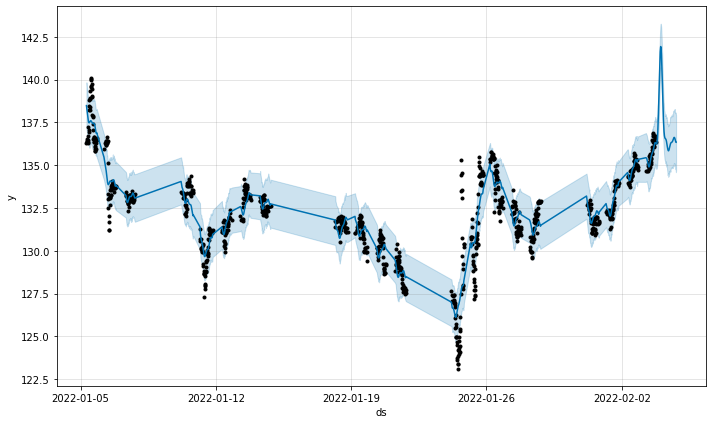

In [35]:
fig1 = model.plot(forecast)